<a href="https://colab.research.google.com/github/Ultan-Kearns/ZTM-Tensorflow-Developer-Certificate/blob/master/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

Computer vision is the practice of writing algorithmes which can discover patterns within visual data.  Such as a camera of a self-driving car recognizing the car in front

## Get the data


In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
# unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-04-10 21:02:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.4MB/s    in 5.6s    

2024-04-10 21:02:26 (18.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



The images we're working with are from the Food101 dataset(101 different classes of food): https://kaggle.com/dansbecker/food101

However we've modified it to use only two classes(pizza & steak) using the image data modification notebook https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note** We start with a smaller dataset so that we can experiment quickly so we can figure out what works and what doesn't work before scaling up.

## Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning project is becoming one with the dataset

And for computer vision project.... this usually means visualizing many smamples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

# walk through the pizza_steak directory and list the number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
# Another way to find out how many images are in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images first let's get the class names programmatically

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class names from sub directories
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Set up the target directory(we'll view images from here)
  target_folder = target_dir+"/"+target_class
  # Get the random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  # Read in image and plot using matplot lib
  img = mpimg.imread(target_folder + "/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


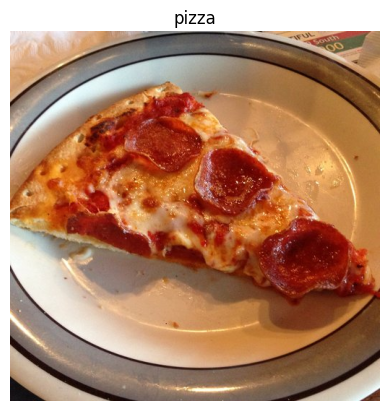

In [9]:
# View random image from the dataset
classes = ["pizza","steak"]
img = view_random_image("pizza_steak/train",classes[random.randint(0,1)])

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[240, 228, 228],
        [232, 220, 220],
        [230, 220, 221],
        ...,
        [172, 135,  93],
        [171, 137,  92],
        [173, 139,  94]],

       [[245, 233, 233],
        [234, 222, 222],
        [231, 221, 222],
        ...,
        [173, 136,  94],
        [168, 134,  89],
        [167, 133,  88]],

       [[250, 240, 241],
        [237, 227, 228],
        [233, 223, 224],
        ...,
        [179, 142, 100],
        [172, 137,  95],
        [169, 134,  92]],

       ...,

       [[ 28,  23,  27],
        [ 25,  20,  24],
        [ 24,  19,  23],
        ...,
        [108,  66,  44],
        [112,  71,  49],
        [113,  72,  50]],

       [[ 23,  18,  22],
        [ 22,  17,  21],
        [ 24,  19,  23],
        ...,
        [107,  63,  38],
        [110,  64,  40],
        [110,  64,  38]],

       [[ 20,  15,  19],
        [ 22,  17,  21],
        [ 27,  22,  26],
        ...,
        [118,  72,  4

In [11]:
# View the image shape
img.shape # returns width, heigh, colour channels

(512, 512, 3)

In [12]:
img / 255.

array([[[0.94117647, 0.89411765, 0.89411765],
        [0.90980392, 0.8627451 , 0.8627451 ],
        [0.90196078, 0.8627451 , 0.86666667],
        ...,
        [0.6745098 , 0.52941176, 0.36470588],
        [0.67058824, 0.5372549 , 0.36078431],
        [0.67843137, 0.54509804, 0.36862745]],

       [[0.96078431, 0.91372549, 0.91372549],
        [0.91764706, 0.87058824, 0.87058824],
        [0.90588235, 0.86666667, 0.87058824],
        ...,
        [0.67843137, 0.53333333, 0.36862745],
        [0.65882353, 0.5254902 , 0.34901961],
        [0.65490196, 0.52156863, 0.34509804]],

       [[0.98039216, 0.94117647, 0.94509804],
        [0.92941176, 0.89019608, 0.89411765],
        [0.91372549, 0.8745098 , 0.87843137],
        ...,
        [0.70196078, 0.55686275, 0.39215686],
        [0.6745098 , 0.5372549 , 0.37254902],
        [0.6627451 , 0.5254902 , 0.36078431]],

       ...,

       [[0.10980392, 0.09019608, 0.10588235],
        [0.09803922, 0.07843137, 0.09411765],
        [0.09411765, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images.  More specifically we need a way to:

* Load our images
* Pre process our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Preprocess data(get all pixel values between 1 & 0, also called scaling / normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"
# Import data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(train_dir,batch_size=32, target_size=(224,224), class_mode="binary",seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

# Build a CNN model (Same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 260ms/step - loss: 0.6252 - accuracy: 0.6533 - val_loss: 0.4728 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 7s 139ms/step - loss: 0.4707 - accuracy: 0.7913 - val_loss: 0.3873 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 7s 139ms/step - loss: 0.4373 - accuracy: 0.8100 - val_loss: 0.3609 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3961 - accuracy: 0.8240 - val_loss: 0.3463 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 6s 133ms/step - loss: 0.3488 - accuracy: 0.8600 - val_loss: 0.3448 - val_accuracy: 0.8640


**Note:** If the above cell is taking longer than ~10 seconds per epoch make sure you're using a GPU runtime

In [14]:
# Get model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data

The model we're building is from the [tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.94210&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [15]:
# set random seed
tf.random.set_seed(42)

# create the model  to replicate Tensorflow Playground Model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_2 = model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 113ms/step - loss: 1.1895 - accuracy: 0.5073 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 134ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 126ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [16]:
# set random seed
tf.random.set_seed(42)

my_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# compile the model
my_model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_3 = my_model.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 150ms/step - loss: 0.8353 - accuracy: 0.5387 - val_loss: 0.6555 - val_accuracy: 0.6300
Epoch 2/5
47/47 [==============================] - 6s 122ms/step - loss: 0.6496 - accuracy: 0.5907 - val_loss: 0.6327 - val_accuracy: 0.6380
Epoch 3/5
47/47 [==============================] - 7s 139ms/step - loss: 0.6275 - accuracy: 0.6573 - val_loss: 0.5826 - val_accuracy: 0.7180
Epoch 4/5
47/47 [==============================] - 6s 120ms/step - loss: 0.5463 - accuracy: 0.7180 - val_loss: 0.4594 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4696 - accuracy: 0.7833 - val_loss: 0.4588 - val_accuracy: 0.7800


In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our original CNN, the model performs terribly... let's try again

In [18]:
# set random seed
tf.random.set_seed(42)

# create the model  to replicate Tensorflow Playground Model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_3 = model_3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 140ms/step - loss: 1.8941 - accuracy: 0.6347 - val_loss: 1.0482 - val_accuracy: 0.5340
Epoch 2/5
47/47 [==============================] - 5s 114ms/step - loss: 1.2508 - accuracy: 0.6560 - val_loss: 1.0027 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 6s 120ms/step - loss: 0.6987 - accuracy: 0.7260 - val_loss: 0.5509 - val_accuracy: 0.7660
Epoch 4/5
47/47 [==============================] - 6s 120ms/step - loss: 0.6548 - accuracy: 0.7433 - val_loss: 0.6808 - val_accuracy: 0.6540
Epoch 5/5
47/47 [==============================] - 6s 129ms/step - loss: 0.5301 - accuracy: 0.7573 - val_loss: 0.4199 - val_accuracy: 0.8040


In [19]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_7 (Dense)             (None, 100)               15052900  
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
15000000 / 31000

483.8709677419355

**Note:** You can think of trainable parameters as **patterns a model can learn from data**. intuitively, better. And in lots of cases it is. But in this case, the difference here is two different styles of model we're using where a series of dense layers has a number of different learnable parameters connected to each other and hence a high number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**.  So even though these are less learnable parameters in our CNN, these are often more helpful in deciphering between different features in an image.

In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Binary Classification: Let's break it down
1. Become one with the data(visualize,visualize,visualize)
2. Preprocess the data(prepped it for our model, the main step was scaling / normalizing)
3. Created a model(start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model(try to beat our baseline)
7. Repeat until satisfied(experiment,experiment,experiment)

### 1. Become one with the data

Image shape: (341, 512, 3)
Image shape: (512, 512, 3)


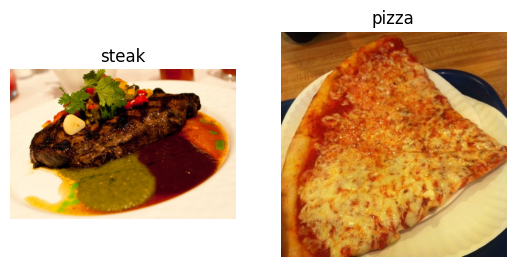

In [22]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

## 2. Pre-process the data(prepare it for a model)

In [23]:
# Define our directory dataset paths

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**

A batch is a small subset of the data.  Splits data into a certain number to make training easier and so as not to cause overflows.

it does this for a couple of reasons:
1. memory limitations - larger numbers may not fit on memory available
2. Trying to learn patterns in 10k images in one hit could result in the model not being able to learn very well.

why 32?

Because 32 is standard practice, although larger numbers could be useful in some cases.

In [24]:
# create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [25]:
# Load our image data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),class_mode="binary",batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,target_size=(224,224),class_mode="binary",batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Get a sample of a training data batch
images, labels = train_data.next() # get next batch of images / labels in train data
len(images),len(labels)

(32, 32)

In [27]:
# How many batches are there
len(train_data)

47

In [28]:
1500 / 32

46.875

In [29]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.69411767, 0.5686275 , 0.50980395],
          [0.69411767, 0.57254905, 0.5019608 ],
          [0.69411767, 0.5803922 , 0.50980395],
          ...,
          [0.5294118 , 0.427451  , 0.29803923],
          [0.5294118 , 0.427451  , 0.28235295],
          [0.5294118 , 0.43137258, 0.27450982]],
 
         [[0.7058824 , 0.58431375, 0.5137255 ],
          [0.69803923, 0.58431375, 0.5137255 ],
          [0.6862745 , 0.5764706 , 0.49411768],
          ...,
          [0.54509807, 0.4431373 , 0.3137255 ],
          [0.5294118 , 0.427451  , 0.2901961 ],
          [0.5294118 , 0.427451  , 0.28235295]],
 
         [[0.6862745 , 0.5764706 , 0.4901961 ],
          [0.68235296, 0.57254905, 0.4901961 ],
          [0.69411767, 0.58431375, 0.5019608 ],
          ...,
          [0.5568628 , 0.45098042, 0.33333334],
          [0.5411765 , 0.43529415, 0.31764707],
          [0.5411765 , 0.43529415, 0.31764707]],
 
         ...,
 
         [[0.7686275 , 0.5647059 , 0.41176474],
          [0.76862

In [30]:
images[7].shape

(224, 224, 3)

In [31]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.],
      dtype=float32)

### 3. Create a CNN model(start with a baseline)

A baseline is a relatively simple model or existing result that you setup when you start a machine learning model which you will use as a metric when comparing to other models

**NOTE:** In deep learning there is an almost infinite amount of architectures you could create.  So one of the best ways to get started is start by using something simple and see if it works then introduce complexity as required.

In [32]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [33]:
model_4 = Sequential([Conv2D(filters=10, # Filter is the number of sliding windows going across the input
                             kernel_size=3, # The size of the sliding window going across an input
                             strides=1, # The size of the step the sliding window takes across an input
                             padding="valid", # if 'same' the output shape is same as input shape, if 'valid' output shape gets compressed
                             activation="relu",
                             input_shape=(224,224,3)), #input layer
                      Conv2D(10,3,activation="relu"),
                      Conv2D(10,3,activation="relu"),
                      Flatten(),
                      Dense(1,activation="sigmoid") # output layer 1 and sigmoid since bary
                      ])

In [34]:
model_4.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

## 4. Fit the model

In [35]:
# Check the lengths of training and test generators
len(train_data), len(test_data)

(47, 16)

In [36]:
# fit the model
history_4 = model_4.fit(train_data, epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 141ms/step - loss: 0.8101 - accuracy: 0.5807 - val_loss: 0.5439 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 7s 144ms/step - loss: 0.4705 - accuracy: 0.7760 - val_loss: 0.4045 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 6s 133ms/step - loss: 0.3474 - accuracy: 0.8507 - val_loss: 0.4289 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.2278 - accuracy: 0.9280 - val_loss: 0.4666 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 6s 121ms/step - loss: 0.1309 - accuracy: 0.9647 - val_loss: 0.6526 - val_accuracy: 0.6940


In [37]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 87ms/step - loss: 0.3448 - accuracy: 0.8640


[0.34480181336402893, 0.8640000224113464]

In [38]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## 5. evaluating our model

It looks like our model is learning something, let's evaluate it.

<Axes: >

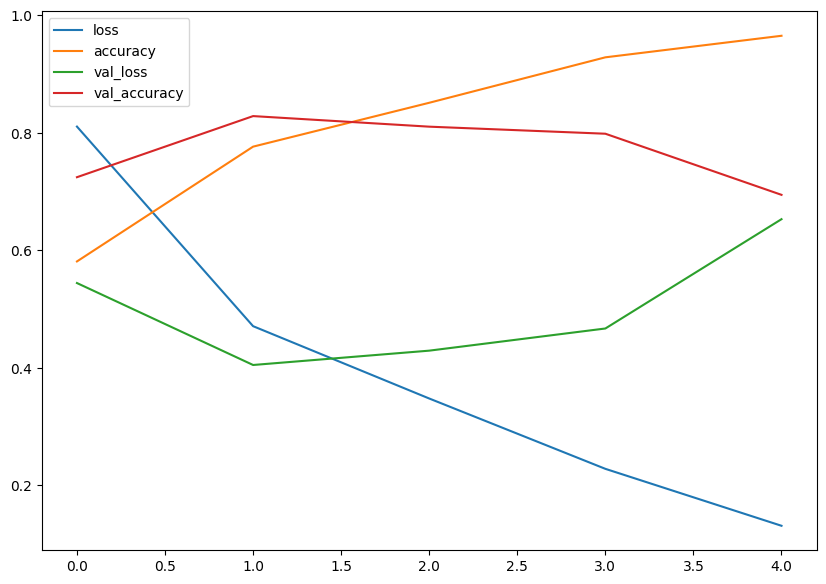

In [39]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [40]:
# Plot the validation and training curves seperately

def plot_loss_curve(history):
  """
  Returns separate loss curves for training and validation loss curves
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs,loss,label="Training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

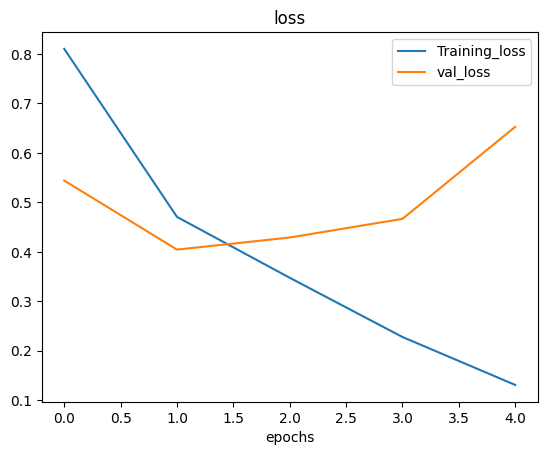

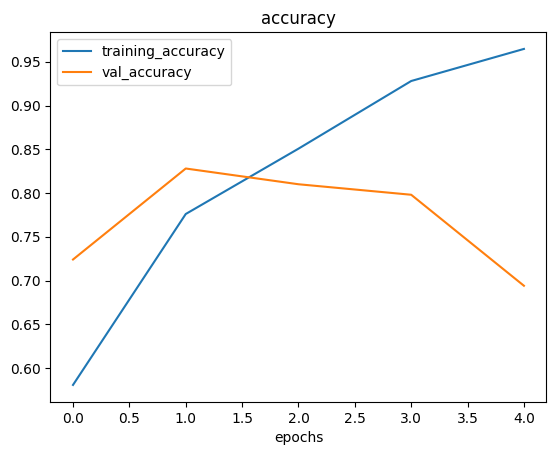

In [41]:
plot_loss_curve(history_4)

**Note:** When a model's **Validation loss starts to increase**, it's likely that the model is **Overfitting** the training dataset.  This means it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:

* Add data augmentation
* Add regularization layers(such as MaxPool2D)
* Add more data...

> **Note:** Reducing overfitting is also known as **Regularization**.

In [42]:
# Create the model(this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(10,2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [43]:
# compile the model
model_5.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

In [44]:
history_5 = model_5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 126ms/step - loss: 0.6110 - accuracy: 0.6667 - val_loss: 0.4775 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4795 - accuracy: 0.7760 - val_loss: 0.3911 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4429 - accuracy: 0.8033 - val_loss: 0.3612 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4093 - accuracy: 0.8187 - val_loss: 0.3551 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 7s 145ms/step - loss: 0.4063 - accuracy: 0.8233 - val_loss: 0.3494 - val_accuracy: 0.8640


In [45]:
# Get a summary of our model with max polling
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 50, 50, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 48, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 24, 24, 10)       

In [46]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_11 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


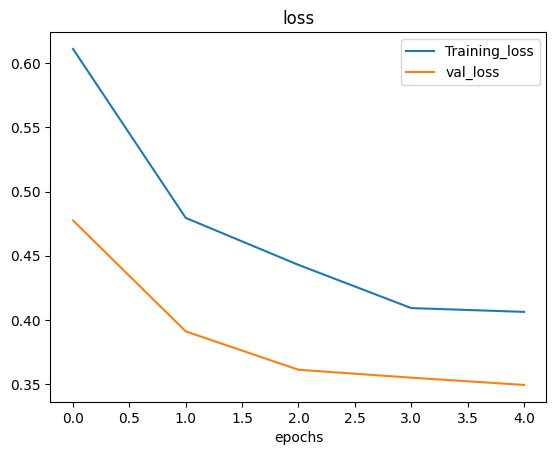

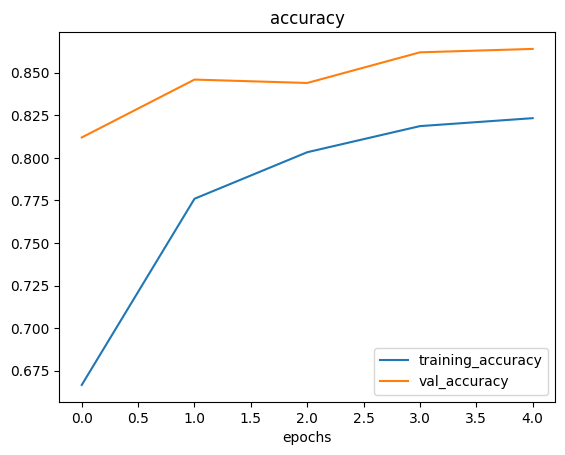

In [47]:
# Plot loss curves
plot_loss_curve(history_5)

### Opening our bag of tricks and finding data augmentation

In [48]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.02,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen=ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen=ImageDataGenerator(rescale=1/255.)

Data Augmentation modifies the image slightly to allow for more diversity in the dataset which artificially inflates it.  This allows the model to better generalise to new data.

In [49]:
# import data and augment it from training directory
print("Augmented training data")

IMG_SIZE = (224,224)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=32,
                                            class_mode="binary",
                                            shuffle=False)
# create non-augmented train data batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Non-augmented test data: 
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data.  Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data

In [50]:
# Get sample of augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 13


(-0.5, 223.5, 223.5, -0.5)

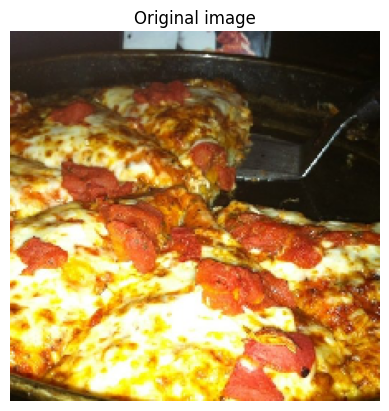

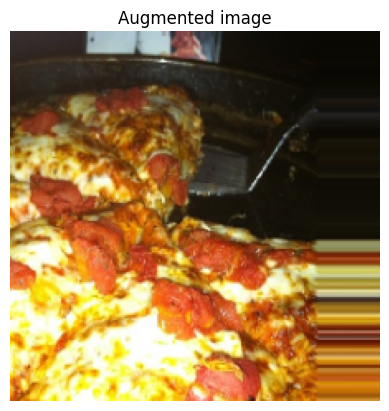

In [51]:
random_number = random.randint(1,32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Now let's try on our augmented set

In [52]:
# Create the model(this is going to be our new baseline)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(10,2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# compile the model
model_6.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 22s 448ms/step - loss: 0.7386 - accuracy: 0.4693 - val_loss: 0.6909 - val_accuracy: 0.5840
Epoch 2/5
47/47 [==============================] - 21s 456ms/step - loss: 0.6951 - accuracy: 0.5133 - val_loss: 0.6911 - val_accuracy: 0.6120
Epoch 3/5
47/47 [==============================] - 22s 458ms/step - loss: 0.6933 - accuracy: 0.5293 - val_loss: 0.6892 - val_accuracy: 0.6500
Epoch 4/5
47/47 [==============================] - 20s 433ms/step - loss: 0.6929 - accuracy: 0.5907 - val_loss: 0.6558 - val_accuracy: 0.7400
Epoch 5/5
47/47 [==============================] - 21s 439ms/step - loss: 0.6892 - accuracy: 0.5733 - val_loss: 0.6729 - val_accuracy: 0.5900


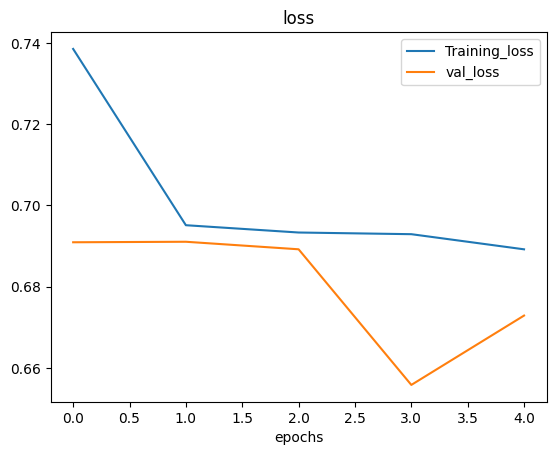

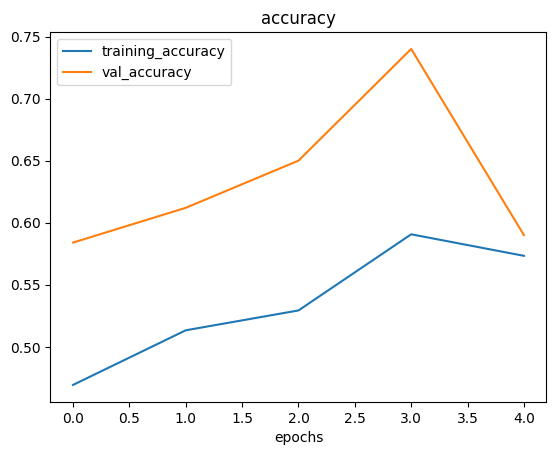

In [53]:
# Check models training curves
plot_loss_curve(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [54]:
train_datagen_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                               target_size=(224,224),
                                                                               class_mode="binary",
                                                                               batch_size=32,
                                                                               shuffle=True)


Found 1500 images belonging to 2 classes.


In [55]:
# Create the model (same as model 5 and model 6)
# Create the model(this is going to be our new baseline)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(10,2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# compile the model
model_7.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

history_7 = model_7.fit(train_datagen_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 23s 447ms/step - loss: 0.6715 - accuracy: 0.5587 - val_loss: 0.5488 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 21s 451ms/step - loss: 0.5447 - accuracy: 0.7247 - val_loss: 0.5768 - val_accuracy: 0.6820
Epoch 3/5
47/47 [==============================] - 21s 454ms/step - loss: 0.5310 - accuracy: 0.7447 - val_loss: 0.3786 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 20s 423ms/step - loss: 0.4689 - accuracy: 0.7807 - val_loss: 0.3350 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 21s 446ms/step - loss: 0.4539 - accuracy: 0.7807 - val_loss: 0.3705 - val_accuracy: 0.8360


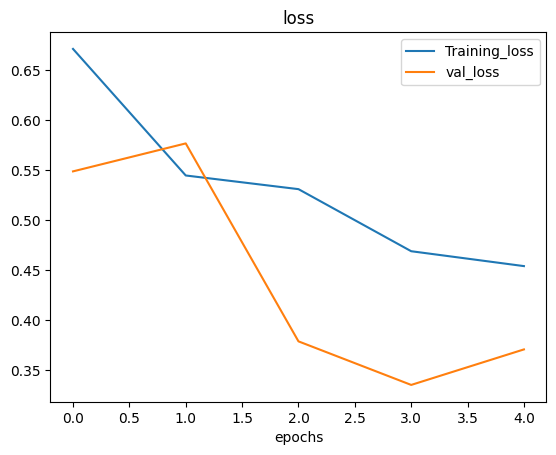

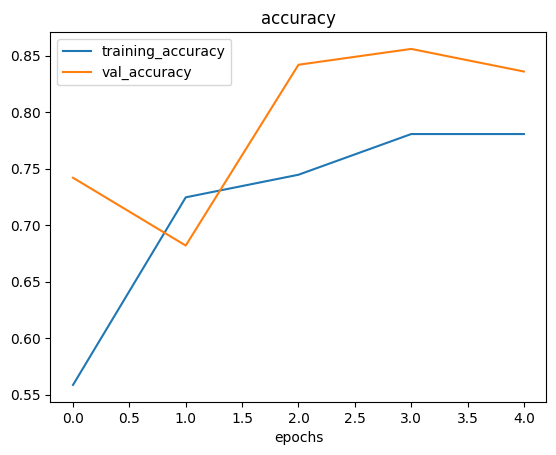

In [56]:
plot_loss_curve(history_7)

When shuffling training data the model gets exposed to random images from both classes while training, this is important as it allows the model to learn from both classess simultaneously.

## 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers(e.g. add more `Conv2D` layer)
* Increase the number of filters in each convolutional layer
* Train for longer
* Find ideal learning rate(possibly using callbacks)
* Get more data(Allows model to better generalise)
* Use **Transfer Learning** to leverage what another model has learned and use it for our own use case

> Practice: **Recreate model on CNN website** same as `model_1` and see how it performs on augmented training data

In [57]:
model_1_recreated = Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_1_recreated.compile(loss="binary_crossentropy",
                          optimizer=Adam(),
                          metrics=["accuracy"])

In [58]:
history_model_1_recreated = model_1_recreated.fit(train_datagen_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 23s 463ms/step - loss: 0.6696 - accuracy: 0.5893 - val_loss: 0.5529 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 22s 463ms/step - loss: 0.5642 - accuracy: 0.7140 - val_loss: 0.5144 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 22s 469ms/step - loss: 0.5446 - accuracy: 0.7193 - val_loss: 0.3845 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 21s 445ms/step - loss: 0.4958 - accuracy: 0.7607 - val_loss: 0.3753 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 21s 457ms/step - loss: 0.4824 - accuracy: 0.7667 - val_loss: 0.3401 - val_accuracy: 0.8520


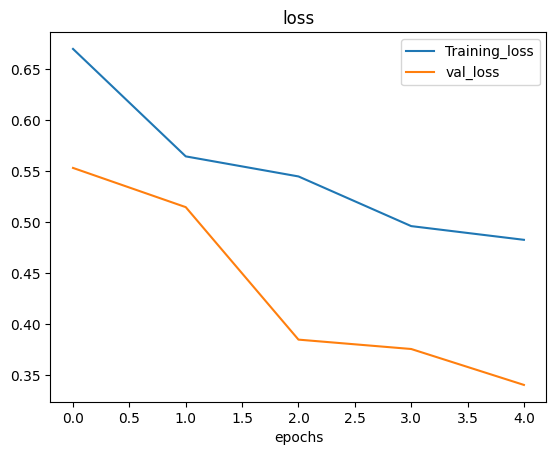

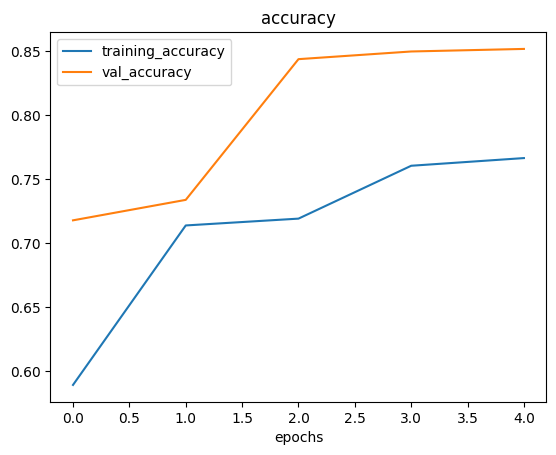

In [59]:
plot_loss_curve(history_model_1_recreated)

Making a prediction with our trained model
What good is a trained model if you can't make predictions with it?

To really test it out, we'll upload a couple of our own images and see how the model goes.

First, let's remind ourselves of the classnames and view the image we're going to test on.



In [60]:
# Classes we're working with
print(class_names)


['pizza' 'steak']


--2024-04-10 21:13:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2024-04-10 21:13:01 (201 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



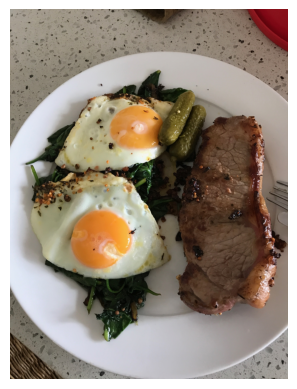

In [61]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [62]:
steak.shape


(4032, 3024, 3)

Since our model takes in images of shapes (224, 224, 3), we've got to reshape our custom image to use it with our model.

To do so, we can import and decode our image using tf.io.read_file (for readining files) and tf.image (for resizing our image and turning it into a tensor).

🔑 Note: For your model to make predictions on unseen data, for example, your own custom images, the custom image has to be in the same shape as your model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.



In [63]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [64]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [65]:
model_1_recreated.predict(steak)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)


There's one more problem...

Although our image is in the same shape as the images our model has been trained on, we're still missing a dimension.

Remember how our model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of (batch_size, 224, 224, 3).

We can fix this by adding an extra to our custom image tensor using tf.expand_dims.



In [66]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak


Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [67]:
# Make a prediction on custom image tensor
pred = model_1_recreated.predict(steak)
pred

1/1 [==============================] - 0s 276ms/step


array([[0.8701557]], dtype=float32)

Ahh, the predictions come out in prediction probability form. In other words, this means how likely the image is to be one class or another.

Since we're working with a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the postive class (class 1).

And if the prediction probability is under 0.5, according to the model, the predicted class is most likely to be the negative class (class 0).

🔑 Note: The 0.5 cutoff can be adjusted to your liking. For example, you could set the limit to be 0.8 and over for the positive class and 0.2 for the negative class. However, doing this will almost always change your model's performance metrics so be sure to make sure they change in the right direction.

But saying positive and negative class doesn't make much sense when we're working with pizza 🍕 and steak 🥩...

So let's write a little function to convert predictions into their class names and then plot the target image.



In [68]:
# Remind ourselves of our class names
class_names


array(['pizza', 'steak'], dtype='<U5')

In [69]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class


'steak'

In [70]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 21ms/step


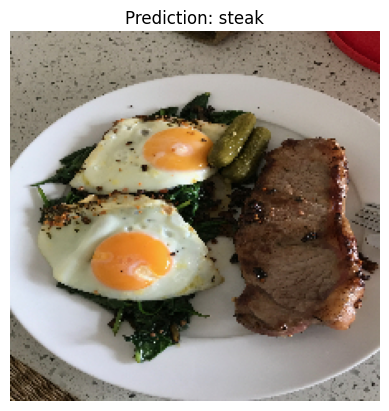

In [71]:
# Test our model on a custom image
pred_and_plot(model_1_recreated, "03-steak.jpeg", class_names)


Nice! Our model got the prediction right.

The only downside of working with food is this is making me hungry.

Let's try one more image.



--2024-04-10 21:18:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2024-04-10 21:18:17 (121 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 97ms/step


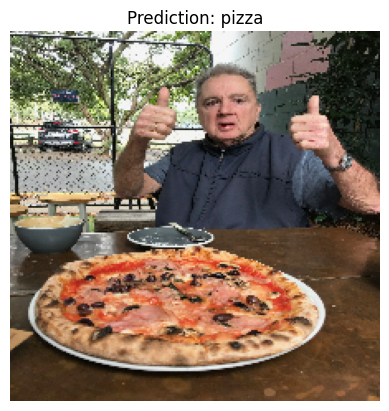

In [72]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_1_recreated, "03-pizza-dad.jpeg", class_names)


## Multi-class Image Classification
We've just been through a bunch of the following steps with a binary classification problem.  Now we're going to step things up a notch using 10 classes instead of 2.
1. Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust differing hyper params and improve model(to beat our baseline and to reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [73]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip  our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2024-04-10 21:39:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.250.4.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  16.7MB/s    in 33s     

2024-04-10 21:39:41 (15.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [75]:
import os
# walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in `{dirpath}`")

There are 2 directories and 0 images in `10_food_classes_all_data`
There are 10 directories and 0 images in `10_food_classes_all_data/train`
There are 0 directories and 750 images in `10_food_classes_all_data/train/grilled_salmon`
There are 0 directories and 750 images in `10_food_classes_all_data/train/steak`
There are 0 directories and 750 images in `10_food_classes_all_data/train/pizza`
There are 0 directories and 750 images in `10_food_classes_all_data/train/chicken_curry`
There are 0 directories and 750 images in `10_food_classes_all_data/train/chicken_wings`
There are 0 directories and 750 images in `10_food_classes_all_data/train/ramen`
There are 0 directories and 750 images in `10_food_classes_all_data/train/fried_rice`
There are 0 directories and 750 images in `10_food_classes_all_data/train/ice_cream`
There are 0 directories and 750 images in `10_food_classes_all_data/train/hamburger`
There are 0 directories and 750 images in `10_food_classes_all_data/train/sushi`
There are 1

In [76]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [83]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [84]:
# Visualise, visualise, visualise
import random
img = view_random_image(target_dir=train_dir,target_class=random.choice(class_name))

NameError: name 'class_name' is not defined